## Notes

It is possible to plot things using Pandas. While it's more common to use a dedicated library like Matplotlib for graphing, you can use Pandas to create graphs. This is mostly used as a way to quickly create a graph for an analysis. 

We won't be focusing on it during this course but it's available if you want to.

View more on that [here](https://pandas.pydata.org/docs/user_guide/visualization.html).

## Plotting Series


In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/Python/Luke Barousse course/Python-for-Data-Analysis/20_Pandas/data_jobs.csv")

In [4]:
# Date cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [5]:
job_counts = df.job_title_short.value_counts()
job_counts

Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: job_title_short, dtype: int64

<Axes: >

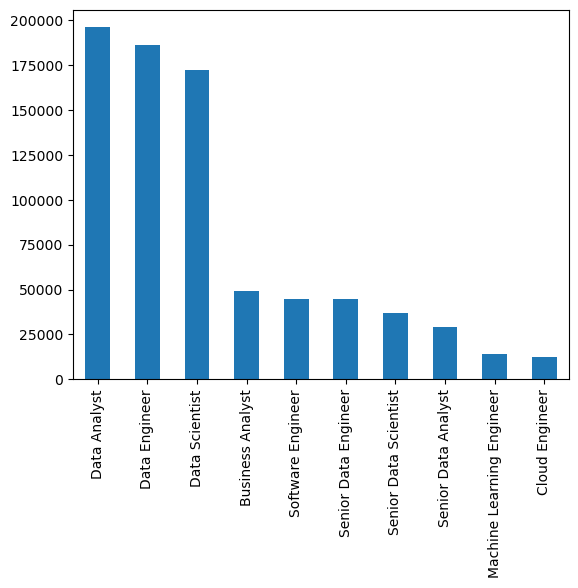

In [6]:
job_counts.plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Analyst'),
  Text(1, 0, 'Data Engineer'),
  Text(2, 0, 'Data Scientist'),
  Text(3, 0, 'Business Analyst'),
  Text(4, 0, 'Software Engineer'),
  Text(5, 0, 'Senior Data Engineer'),
  Text(6, 0, 'Senior Data Scientist'),
  Text(7, 0, 'Senior Data Analyst'),
  Text(8, 0, 'Machine Learning Engineer'),
  Text(9, 0, 'Cloud Engineer')])

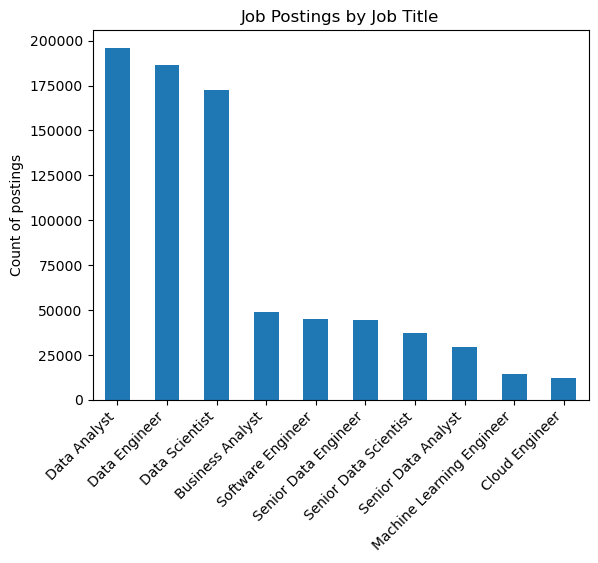

In [7]:
# it has matplotlib in the background so we can customize it as before
job_counts.plot(kind='bar')
plt.ylabel('Count of postings')
plt.title('Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')

## Plotting DataFrames

we will need to provide those x and y's parameters

We want to plot overtime how the salary is trending in 2023

In [8]:
# remove null values
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

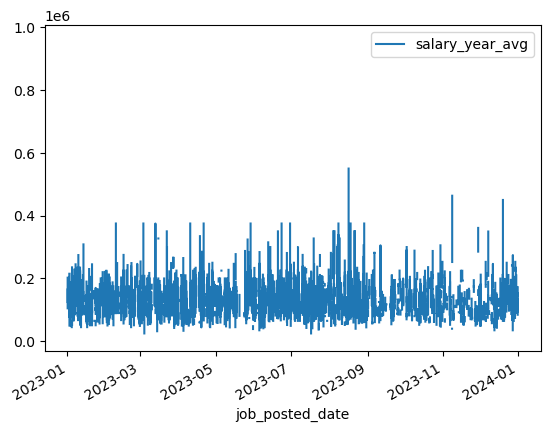

In [11]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

In [ ]:
# we have a lot of data point which is going to create a lot of noise in the chart


### Practice

Create a bar plot with the Pandas .plot() method showing the top 5 job posting platforms (e.g., LinkedIn, Upwork, etc.) with the highest number of job postings. Use the job_via column to count the number of postings for each platform.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [23]:
platform_count = df['job_via'].value_counts().head(5)
platform_count

via LinkedIn       186679
via BeBee          103507
via Trabajo.org     61562
via Indeed          42756
via Recruit.net     23646
Name: job_via, dtype: int64

<Axes: >

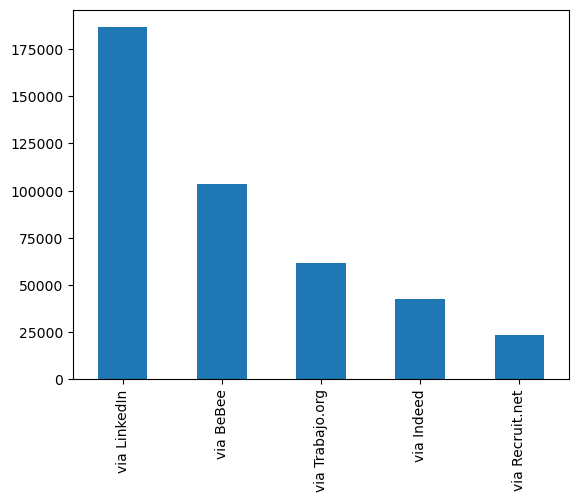

In [25]:
platform_count.plot(kind='bar')

Create a horizontal bar plot showing the top 5 job locations with the highest number of job postings:

Use the job_location column to count the number of postings for each location.
Add in labels for the x-axis (label as 'Count of Jobs'), y-axis (label as 'Job Location'), and a title (set as 'Number of Job Postings by Job Location') for the chart.

In [30]:
job_count_location = df['job_location'].value_counts().head(5)
job_count_location = job_count_location.sort_values(ascending=True)

Text(0.5, 1.0, 'Number of Job Postings by Job Location')

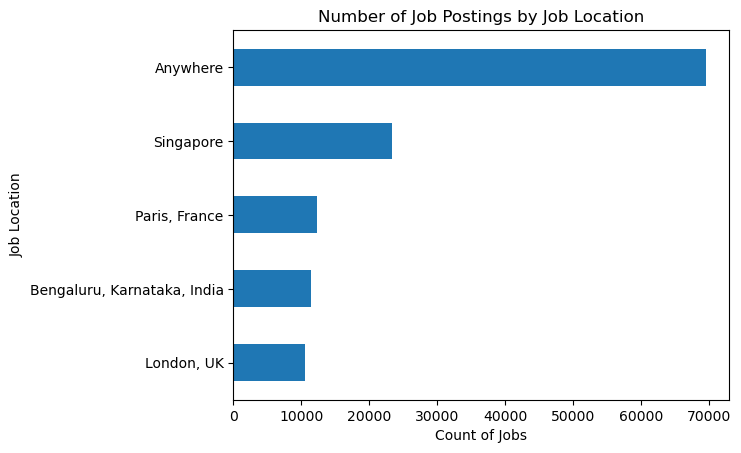

In [33]:
job_count_location.plot(kind='barh')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Location')
plt.title('Number of Job Postings by Job Location')

Create a line plot showing the trend of job postings over time using the Pandas method to plot:

Create a DataFrame called monthly_job_counts and use the job_posted_date column to count the number of job postings for each month (in the format 'Jan').
Add labels for the x-axis (label as 'Month'), y-axis (label as 'Number of Job Postings'), and a title (set as 'Trend of Job Postings Over Time') for the chart.

In [46]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M') #initially i transformed to month_name - but that ordered by the name of the month alphabetiaclly instead of chronologically

In [42]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023-03
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023-03
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023-03
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023-03


In [43]:
monthly_job_counts = df['job_posted_month'].value_counts().sort_index()

In [44]:
monthly_job_counts

2023-01    91822
2023-02    64578
2023-03    64084
2023-04    62919
2023-05    52104
2023-06    61572
2023-07    63777
2023-08    75162
2023-09    62359
2023-10    66611
2023-11    64450
2023-12    56303
Freq: M, Name: job_posted_month, dtype: int64

Text(0.5, 1.0, 'Trend of Job Postings Over Time')

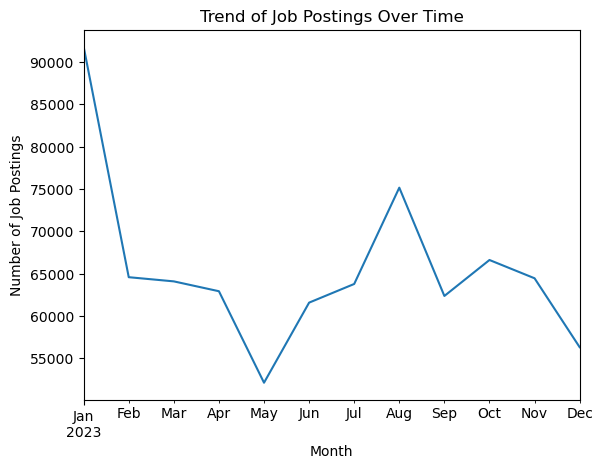

In [47]:
monthly_job_counts.plot(kind='line')
#Add labels for the x-axis (label as 'Month'), y-axis (label as 'Number of Job Postings'), and a title (set as 'Trend of Job Postings Over Time') for the chart.
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Trend of Job Postings Over Time')

## Extra exercise
- calculate the median salary based on the job title

In [51]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

<Axes: ylabel='job_title_short'>

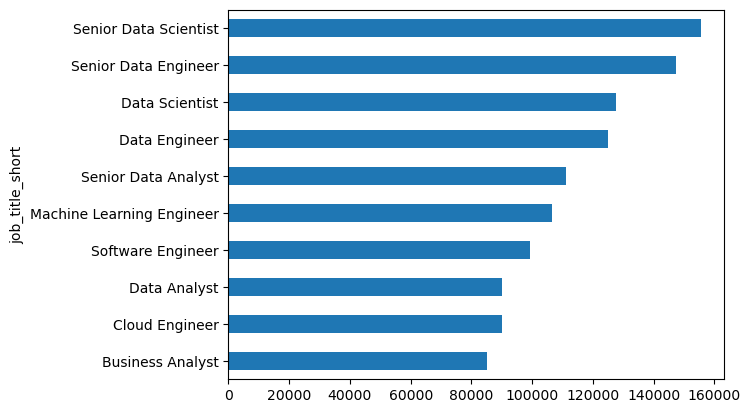

In [ ]:
job_salary.plot(kind='barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')

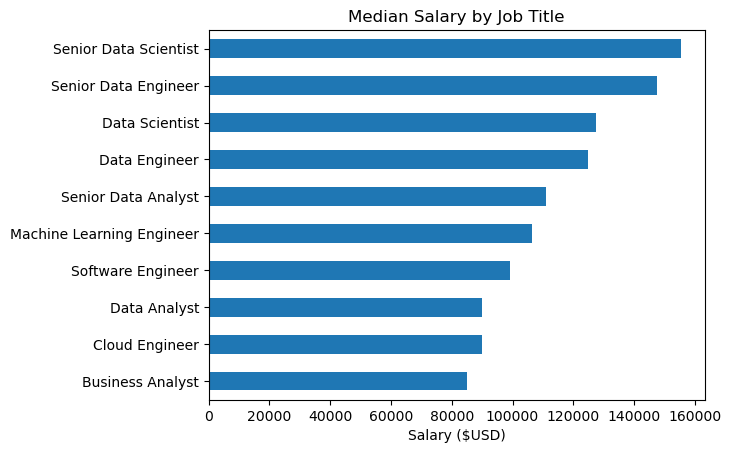

In [53]:
job_salary.plot(kind='barh')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()